### Inferencia Bayesiana

Por ejemplo cuando tenemos parametros desconocidos es una probabilidad ( como lanzar una moneda) , nosotros usamos apriori desde beta distribucino, que pone toda la probabilidad entre 1 y 0 

In [1]:


import math
def B(alpha,beta):
    #una constante de normalizacion, que siempre nos dara como probabilidad total 1
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha*beta)

def beta_pdf(x,alpha,beta):
  
    if x < 0 or x > 1 :  #no hay peso afuera de [0,1]
        return x
    return x ** (alpha - 1) * (1 - x) ** (beta -1 ) / B(alpha,beta)
    
#generalmente esta distribuye su peso centrar en
#alpha / (alpha * beta)

In [2]:
beta_pdf(0.5,1,3)

0.25

### El problema de la moneda

Para este ejemplo, vamos a utilizar una distribución binomial como likelihood y una distribución beta como a priori. Veamos como lo podemos modelar con PyMC3.

In [3]:
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.random.seed(1984) #replicar random

%matplotlib inline

In [5]:

# El problema de la moneda
# de 100 lanzamientos 80 caras
n = 100
caras = 80
# Creación del modelo
niter = 2000
with pm.Model() as modelo_moneda:
    # a priori
    p = pm.Beta('p', alpha=2, beta=2)
    # likelihood
    y = pm.Binomial('y', n=n, p=p, observed=caras)

In [9]:
# Realizando el muestreo para la inferencia
with modelo_moneda:
    trace = pm.sample(2000, cores=4)

/Users/adolfohuerta/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 20 seconds.
The acceptance probability does not match the target. It is 0.8932108830711758, but should be close to 0.8. Try to increase the number of tuning steps.


/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_49422/2683046047.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/adolfohuerta/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


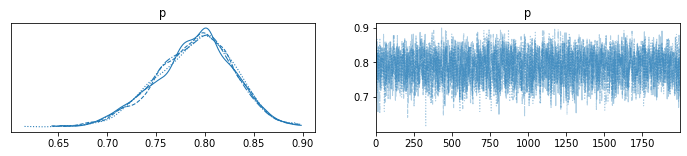

In [19]:
# Analizando los resultados
pm.traceplot(trace)
pass

In [14]:
# Información resumen. 
#Vemos que hay un 95% de probabilidades de que el valor de sesgo este entre
# .706 y .864
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/adolfohuerta/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.789,0.039,0.713,0.86,0.001,0.0,3181.0,5008.0,1.0


Como vemos el modelo nos indica que la moneda parece tener un claro sesgo hacia cara.